> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: movie Box Office analysis Report (1960 - 2015)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


### Dataset Description 
 
### Question(s) for Analysis


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 1.6MB/s eta 0:00:01  2% |▊                               | 245kB 13.6MB/s eta 0:00:01    8% |██▋                             | 870kB 15.4MB/s eta 0:00:01    14% |████▊                           | 1.5MB 13.5MB/s eta 0:00:01    20% |██████▋                         | 2.2MB 16.2MB/s eta 0:00:01    26% |████████▋                       | 2.8MB 14.0MB/s eta 0:00:01    33% |██████████▋                     | 3.5MB 13.5MB/s eta 0:00:01    45% |██████████████▌                 | 4.7MB 16.7MB/s eta 0:00:01    50% |████████████████▏               | 5.3MB 12.4MB/s eta 0:00:01    56% |██████████████████              | 5.9MB 12.3MB/s eta 0:00:01    67% |█████████████████████▌          | 7.0MB 13.2MB/s eta 0:00:01    78% |█████████████████████████       | 8.2MB 13.2MB/s eta 0:00:01    96% |██████████████████████████████▊ | 10.0MB 13.7MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 1.3MB/s eta 0:00:01  1% |▌                           

<a id='wrangling'></a>
## Data Wrangling
 In this part of the analysis, the dataset will be examined to identify missing data, unwanted data as well as fillin any missing data .  




In [2]:
# load Movie Dataset 
movie_df = pd.read_csv('tmdb-movies.csv')
movie_df.head() 



,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


The nunique() method was used to return unique values in the dataset 

In [3]:
movie_df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [3]:
#  the function is intended to remove missing values
def missing_data():
    movie_df.dropna(inplace=True)

In [4]:
missing_data()

To insure the a better quality data it's good to check for missing value count 

In [6]:
movie_df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

if found remove all missing values from the dataset.

In [7]:
movie_df.dropna(inplace=True)

we can place this in python function like we one above.

The duplicated() method was used to identify the total number of duplicated data in the dataset.

In [5]:
sum(movie_df.duplicated())

0

The identfied duplicated data is subseqently removed.

In [6]:
movie_df.drop_duplicates(inplace=True)
sum(movie_df.duplicated())

0

In [10]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 21 columns):
id                      1992 non-null int64
imdb_id                 1992 non-null object
popularity              1992 non-null float64
budget                  1992 non-null int64
revenue                 1992 non-null int64
original_title          1992 non-null object
cast                    1992 non-null object
homepage                1992 non-null object
director                1992 non-null object
tagline                 1992 non-null object
keywords                1992 non-null object
overview                1992 non-null object
runtime                 1992 non-null int64
genres                  1992 non-null object
production_companies    1992 non-null object
release_date            1992 non-null object
vote_count              1992 non-null int64
vote_average            1992 non-null float64
release_year            1992 non-null int64
budget_adj              1992 non-null flo

From the above summary of the data several dataset seem to been in float such as budget-adj which will complicate the analysis so it's converted to types.

In [11]:
movie_df.budget_adj = movie_df.budget_adj.astype(int)

Finally! the shape reveals the number of entries and columns in the dataset.

In [12]:
movie_df.shape

(1992, 21)


### Data Cleaning
> This section the removal of unwanted or unneccessary data from the dataset.

The drop() was used to removed the data which will have little on the analysis of the data

In [7]:
# drop unwanted colunns from dataset
movie_df.drop(['imdb_id', 'homepage', 'tagline','keywords','budget_adj','revenue_adj'],axis=1, inplace=True)


# <a id='eda'></a>
## Exploratory Data Analysis



### how many movies earned less than it's budget?

To know if amovie was successful or not we need to know if it's revenue surpassed budget, movie that don't are clalld flop movies 

In [13]:
movie_flop = movie_df.query('revenue < budget')
movie_flop.info()
# Movies who revenue equlled over was less than it's budget 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 57 to 10489
Data columns (total 21 columns):
id                      424 non-null int64
imdb_id                 424 non-null object
popularity              424 non-null float64
budget                  424 non-null int64
revenue                 424 non-null int64
original_title          424 non-null object
cast                    424 non-null object
homepage                424 non-null object
director                424 non-null object
tagline                 424 non-null object
keywords                424 non-null object
overview                424 non-null object
runtime                 424 non-null int64
genres                  424 non-null object
production_companies    424 non-null object
release_date            424 non-null object
vote_count              424 non-null int64
vote_average            424 non-null float64
release_year            424 non-null int64
budget_adj              424 non-null int64
revenue_adj      

In [15]:
movie_flop = movie_df.query('revenue < budget')
movie_flop.budget.describe()


count    4.240000e+02
mean     2.458948e+07
std      3.566524e+07
min      1.000000e+00
25%      4.500000e+06
50%      1.300000e+07
75%      3.000000e+07
max      4.250000e+08
Name: budget, dtype: float64

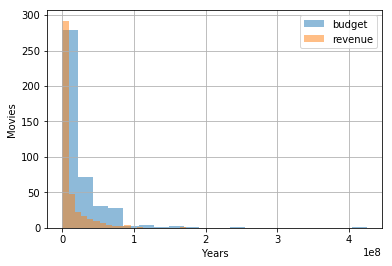

In [16]:
## An Investigation into movies that performed poorly at the box office 
movie_flop.budget.hist(alpha=0.5, bins=20, label='budget')
movie_flop.revenue.hist(alpha=0.5, bins=20, label='revenue')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Movies')
plt.grid(True)

The total of unsuccessful movies by revenue standards are given.

In [17]:
movie_flop.director.value_counts().sum()

424

In [18]:
movie_flop.director.value_counts()

John Carpenter                  8
Francis Ford Coppola            3
Barry Levinson                  3
Brian Robbins                   3
Trey Parker                     2
Terry Gilliam                   2
Lauren Montgomery               2
David Wain                      2
Vincenzo Natali                 2
Chris Columbus                  2
Uwe Boll                        2
Steven Soderbergh               2
Kenny Ortega                    2
George Gallo                    2
Renny Harlin                    2
Oren Moverman                   2
McG                             2
Todd Haynes                     2
Sean Anders                     2
Susanne Bier                    2
Christopher B. Landon           2
Neil Jordan                     2
David Koepp                     2
Dominic Sena                    2
Ron Howard                      2
Rob Reiner                      2
RyÃ»hei Kitamura                2
William Eubank                  2
Brian Koppelman|David Levien    2
Andrew Dominik

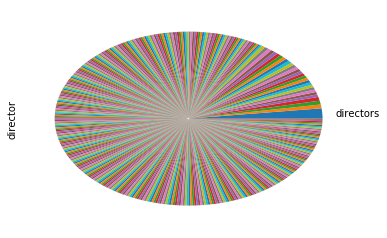

In [19]:
movie_flop.director.value_counts()
labels = np.full(len(movie_flop.director.value_counts()), "", dtype=object)
labels[0] = 'directors'
movie_flop.director.value_counts().plot(kind="pie", labels=labels)

In [20]:
movie_flop.shape

(424, 15)

### How many movies have earned more than it's budget

In [21]:
# How many movies has a revenue more than it's budget.
hit_movies= movie_df.query('revenue > budget')
hit_movies

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015
5,281957,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015
6,87101,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015
7,286217,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015
8,211672,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015
9,150540,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015


In [22]:
hit_movies= movie_df.query('revenue > budget')
hit_movies.budget.describe()

count    1.181000e+03
mean     4.944635e+07
std      5.672792e+07
min      0.000000e+00
25%      7.000000e+06
50%      3.000000e+07
75%      7.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

In [22]:
# most popular genre for hit movies ?
hit_movies= movie_df.query('revenue > budget')
hit_movies.genres.describe()

count       1181
unique       467
top       Comedy
freq          70
Name: genres, dtype: object

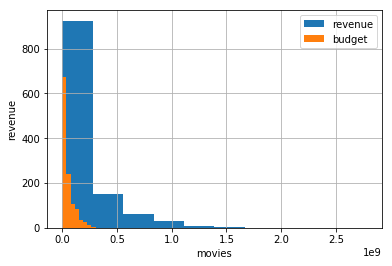

In [24]:
#  An examination of the hit movies show that it eclipsed it's budget 
hit_movies.revenue.hist(label='revenue')
hit_movies.budget.hist(label='budget')
plt.legend()
plt.xlabel('movies')
plt.ylabel('revenue')
plt.grid(True)


### Total number of directors hit movies from the dataset

In [25]:
hit_movies.director.value_counts()

Steven Spielberg                             11
Steven Soderbergh                             9
John Carpenter                                8
Robert Zemeckis                               8
Clint Eastwood                                8
Ridley Scott                                  8
David Fincher                                 7
Christopher Nolan                             7
Peter Jackson                                 7
Paul W.S. Anderson                            6
Michael Bay                                   6
Francis Lawrence                              6
Martin Scorsese                               6
George Lucas                                  5
Zack Snyder                                   5
Dennis Dugan                                  5
Ron Howard                                    5
Guy Hamilton                                  5
John Glen                                     5
Martin Campbell                               5
Kevin Smith                             

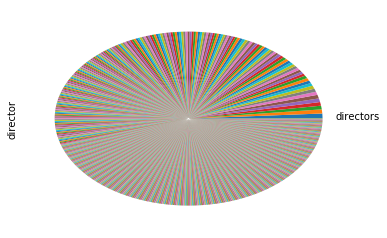

In [26]:
hit_movies.director.value_counts()
labels = np.full(len(hit_movies.director.value_counts()), "", dtype=object)
labels[0] = 'directors'
hit_movies.director.value_counts().plot(kind="pie", labels=labels)

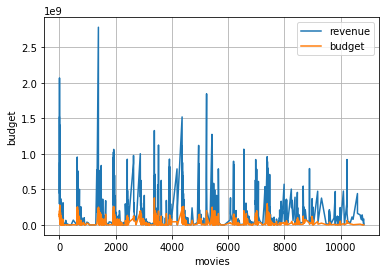

In [28]:
#  Another Visualization of movies whose revenue where greater than Budget.
hit_movies.revenue.plot(kind='line')
hit_movies.budget.plot(kind='line')
plt.legend()
plt.xlabel('movies')
plt.ylabel('budget')
plt.grid(True)


### How many Movie had a budget of over 100 Mil dollars or less

In [29]:
#  Movies with Budget less than 100million Dollars
b_less = movie_df.query('budget < 100000000')
b_less.head()

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
8,211672,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015
12,264660,6.118847,15000000,36869414,Ex Machina,Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...,Alex Garland,"Caleb, a 26 year old coder at the world's larg...",108,Drama|Science Fiction,DNA Films|Universal Pictures International (UP...,1/21/15,2854,7.6,2015
13,257344,5.984995,88000000,243637091,Pixels,Adam Sandler|Michelle Monaghan|Peter Dinklage|...,Chris Columbus,Video game experts are recruited by the milita...,105,Action|Comedy|Science Fiction,Columbia Pictures|Happy Madison Productions,7/16/15,1575,5.8,2015
15,273248,5.898400,44000000,155760117,The Hateful Eight,Samuel L. Jackson|Kurt Russell|Jennifer Jason ...,Quentin Tarantino,Bounty hunters seek shelter from a raging bliz...,167,Crime|Drama|Mystery|Western,Double Feature Films|The Weinstein Company|Fil...,12/25/15,2389,7.4,2015
16,260346,5.749758,48000000,325771424,Taken 3,Liam Neeson|Forest Whitaker|Maggie Grace|Famke...,Olivier Megaton,Ex-government operative Bryan Mills finds his ...,109,Crime|Action|Thriller,Twentieth Century Fox Film Corporation|M6 Film...,1/1/15,1578,6.1,2015


In [8]:
# what  was the best performing movie genre of the dataset.
b_less = movie_df.query('budget < 100000000')
b_less.genres.describe()


count      1778
unique      597
top       Drama
freq        127
Name: genres, dtype: object

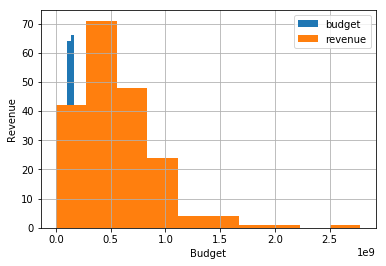

In [13]:
# Do Movies that cost more than 100 million dollars do better. 
b_over = movie_df.query('budget > 100000000')
b_over.budget.hist(label='budget')
b_over.revenue.hist(label='revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.legend()
#  The visuals seem to back that assertion.


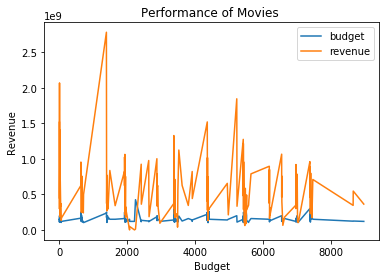

In [10]:
b_over.budget.plot(kind='line', label='budget')
b_over.revenue.plot(kind='line', label='revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Performance of Movies ');
plt.legend()

###  How many Movies over 100mil were made till 2015

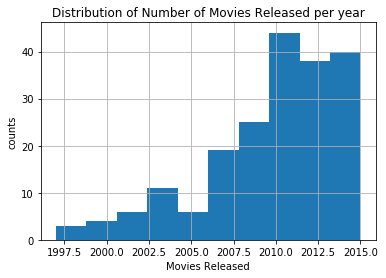

In [11]:
# How many movies made from 1997 till 2015 cost 100 million.
b_over = movie_df.query('budget > 100000000')
b_over.release_year.hist()
plt.xlabel('Movies Released')
plt.ylabel('counts')
plt.title('Distribution of Number of Movies Released per year');



#####  The 1990 were a year of big budget movies and steady grew till 2015.

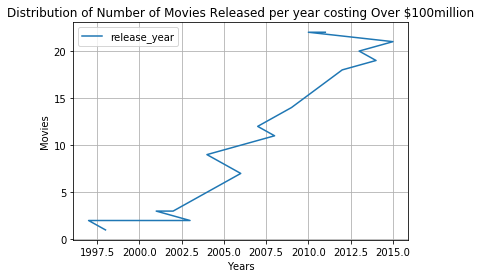

In [12]:
# How many were released Over 100 million per year from 1997 till 2015
b_over.release_year.value_counts().plot(kind='line')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Movies')
plt.title('Distribution of Number of Movies Released per year costing Over $100million');
plt.grid(True)


##### 1997 till 2015 shows an increase of movies released per year.

In [33]:
b_over = movie_df.query('budget > 100000000')
b_over.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 8977
Data columns (total 15 columns):
id                      196 non-null int64
popularity              196 non-null float64
budget                  196 non-null int64
revenue                 196 non-null int64
original_title          196 non-null object
cast                    196 non-null object
director                196 non-null object
overview                196 non-null object
runtime                 196 non-null int64
genres                  196 non-null object
production_companies    196 non-null object
release_date            196 non-null object
vote_count              196 non-null int64
vote_average            196 non-null float64
release_year            196 non-null int64
dtypes: float64(2), int64(6), object(7)
memory usage: 24.5+ KB


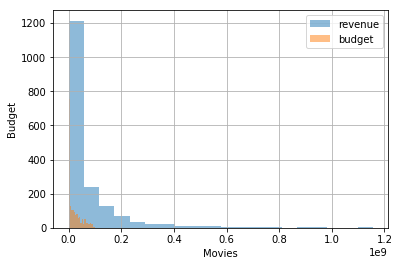

In [44]:
b_less.revenue.hist(alpha=0.5, bins=20, label='revenue')
b_less.budget.hist(alpha=0.5, bins=20, label='budget');
plt.legend()
plt.xlabel('Movies')
plt.ylabel('Budget')
plt.grid(True)


The diagram above and below depicts the number of movies with budgets less than 100 million and their revenue in both histogram and line charts

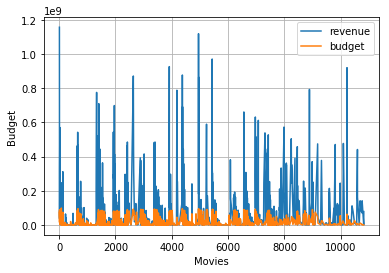

In [34]:
b_less.revenue.plot(kind='line', label='revenue')
b_less.budget.plot(kind='line',label='budget');
plt.legend()
plt.xlabel('Movies')
plt.ylabel('Budget')
plt.grid(True)

In [35]:
# Examining The cloumns of the movies that cost less than 100 millions.
b_less.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'overview', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_count', 'vote_average', 'release_year'],
      dtype='object')

In [36]:
b_less.dtypes[b_less.dtypes == 'int64']

id              int64
budget          int64
revenue         int64
runtime         int64
vote_count      int64
release_year    int64
dtype: object

In [34]:
b_less.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1778 entries, 8 to 10819
Data columns (total 21 columns):
id                      1778 non-null int64
imdb_id                 1778 non-null object
popularity              1778 non-null float64
budget                  1778 non-null int64
revenue                 1778 non-null int64
original_title          1778 non-null object
cast                    1778 non-null object
homepage                1778 non-null object
director                1778 non-null object
tagline                 1778 non-null object
keywords                1778 non-null object
overview                1778 non-null object
runtime                 1778 non-null int64
genres                  1778 non-null object
production_companies    1778 non-null object
release_date            1778 non-null object
vote_count              1778 non-null int64
vote_average            1778 non-null float64
release_year            1778 non-null int64
budget_adj              1778 non-null int

In [37]:
hit_movies.describe().popularity



count    1181.000000
mean        1.858520
std         2.250845
min         0.005391
25%         0.680581
50%         1.232312
75%         2.234953
max        32.985763
Name: popularity, dtype: float64

### how many movies has been release per 

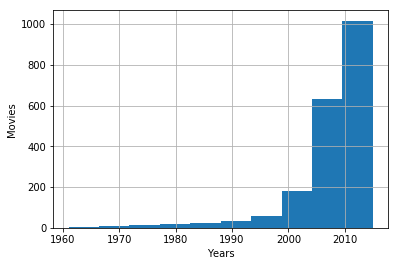

In [38]:
# Has there number of number of movies made per year increased.
movie_df.release_year.hist();
plt.legend()
plt.xlabel('Years')
plt.ylabel('Movies')
plt.grid(True)

The histogarm clearly show the increase in the big budget movies since 1995 with 2015 being the highest.

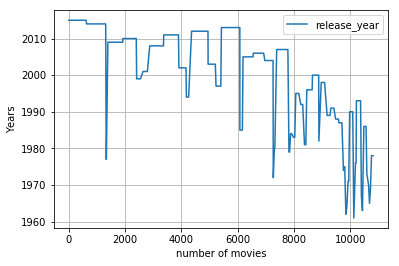

In [39]:
movie_df.release_year.plot(kind='line')
plt.legend()
plt.xlabel('number of movies')
plt.ylabel('Years')
plt.grid(True)

###  what are the most popular from year to year

In [40]:
movie_df.describe().popularity

count    1992.000000
mean        1.316763
std         1.873563
min         0.000620
25%         0.384079
50%         0.774223
75%         1.538639
max        32.985763
Name: popularity, dtype: float64

### Which year has the highest number of movie release.

In [191]:
movie_df.release_year.describe()

count    10865.000000
mean      2001.321859
std         12.813260
min       1960.000000
25%       1995.000000
50%       2006.000000
75%       2011.000000
max       2015.000000
Name: release_year, dtype: float64

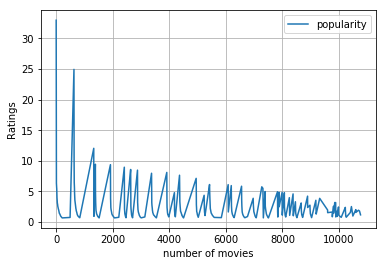

In [38]:
# How many movies are gerater or equal to the mean popularity rating 
movie_pop = movie_df.query('popularity >= 0.65')
movie_pop.popularity.plot(kind='line', label='popularity')
plt.legend()
plt.xlabel('number of movies')
plt.ylabel('Ratings')
plt.grid(True)

In [ ]:
msno.bar()

# ## conclusion 


1. The is 75% of all movies till 2015 were released in 2011
2. 0ver 3500 movies have been release since 1960
3. The number of hit movies is greater that flop movies 
4. only 282 have budgets of over 100 million dollars 
5. hit_movies have a higher mean popularity score. 
6. The most popular genre for hit movies since 1960 has been comedy

Limitations:
The large combinations of genres or combination makes its difficult to plot certain charts 




## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [14]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0